<a href="https://colab.research.google.com/github/zilioalberto/Ciencia_De_Dados/blob/main/Aula_04_Ciencia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Alunos: Alberto Zilio
## Roni Pereira

In [2]:
#Respondendo as 12 perguntas

# 1. Olhando para a nossa pergunta de negócio do Encontro 1, qual é a principal história que esperamos que os dados nos contem? O que seria uma descoberta "surpreendente e o que seria uma descoberta "esperada"?
# R: Que o preço por m² dos apartamentos no Centro de Florianópolis é explicado principalmente por características do imóvel (especialmente área em m² e vagas de garagem) e por fatores locacionais, com prêmio claro para “vista para o mar” e valorização pela proximidade à Beira Mar Norte. Essa narrativa deriva diretamente da sua pergunta de negócio definida no Encontro 1, usando o dataset tb_mercadoimob.csv (com variáveis de preço, área, vagas, descrições textuais para extrair “vista para o mar” e coordenadas para distância), e do objetivo da Aula 04 de interpretar visualmente padrões ligados à pergunta.


In [ ]:
# #2. Se tivéssemos apenas a tabela de dados e as estatísticas do .describe(), sem nenhum gráfico, que informações importantes sobre nossoproblema poderíamos estar perdendo? (Para responder essa questão pense sobre o Quarteto de Anscombe.
# #R: Em uma frase: sem visualização, corremos o risco de concluir que “nada acontece” porque as estatísticas resumidas são parecidas — quando, na verdade, os dados podem contar histórias completamente diferentes (exatamente o ponto do Anscombe/Datasaurus).

# Perderiamos:

# Formas de distribuição (assimetria, caudas longas, múltiplos picos): médias/DP iguais podem esconder bimodalidade (ex.: imóveis antigos vs. novos) que só aparece em histogramas/boxplots.

# Relações não lineares entre variáveis (p.ex., área ↑ e preço ↑ até certo ponto, depois saturação). A correlação de .describe() não mostra curvas; o scatter plot mostra.

# Grupos/segmentos ocultos (clusters): mesmo com médias idênticas, padrões podem ser completamente diferentes (lição do Quarteto de Anscombe/Datasaurus: “mesmas estatísticas, gráficos diferentes”).

# Outliers e pontos influentes: afetam média/desvio, mas a gravidade deles (e seu impacto prático) fica clara só no boxplot/scatter.

# Heterocedasticidade (variância que muda com o valor): .describe() dá um único desvio-padrão; já o scatter revela “funil” (ex.: valores altos com dispersão maior).

# Interações/contexto categórico: médias globais escondem diferenças por tipo_imovel, estado_construcao, etc.; boxplots por categoria revelam histórias distintas.

In [2]:
# # 3.Quem seria o público para os nossos gráficos? Um colega técnico, um gerente de produto, um CEO? Como a resposta a essa perguntapoderia mudar o tipo de gráfico que escolhemos ou a forma como o apresentamos?
# R:Público-alvo e implicações nos gráficos

# 1) Colega técnico (analista/cientista de dados)

# Objetivo: validar hipóteses, achar padrões/ruídos.

# Gráficos: scatter com linha de tendência/LOESS (preço/m² × área), residual vs. fitted do modelo, box/violino por nº de vagas e “vista mar”, heatmap de correlação, QQ-plot, small multiples por bairro.

# Apresentação: eixos e unidades precisos, IC/erro, notas sobre amostra/limpeza (winsorization, n), escalas (log, se preciso) e suposições do modelo.

# 2) Gerente de produto/negócio

# Objetivo: priorizar ações e segmentos.

# Gráficos: barras ordenadas com efeito estimado em % (ex.: prêmio “vista mar”, impacto de 1→2 vagas), boxplots por segmento (novo vs. antigo), waterfall do preço sugerido (composição), ranking de bairros/faixas de área.

# Apresentação: títulos em linguagem de negócio (“Vista para o mar adiciona +18–25%/m²”), anotações de “so what”, comparativos com meta/benchmark e 2–3 filtros práticos (área, vagas, vista).

# 3) C-level (CEO/diretoria)

# Objetivo: decidir rápido e alocar recursos.

# Gráficos: 1–3 itens no máximo: cards de KPIs (preço/m² médio; prêmio “vista”), barras simples com prêmios percentuais e, se for relevante, mapa do Centro com hot spots.

# Apresentação: mensagem única por gráfico, fontes grandes, zero jargão, call-to-action (“Priorizar captação 60–80 m² com 1–2 vagas e vista: +22%/m²”). Mostrar incerteza como faixa/sombra, sem sobrecarregar.


In [ ]:
# 4. Vamos escolher uma variável numérica central para a nossa pergunta de negócio (ex: preço, idade, duração). Antes de plotar, qual é anossa hipótese sobre a sua distribuição? Acreditamos que os valores serão concentrados em uma faixa específica, ou bem espalhados?
# R: Variável central

# Preço por m² (preco_m2) — é a métrica mais alinhada à pergunta de negócio.

# Hipótese sobre a distribuição (antes de ver o gráfico)

# Forma: assimétrica à direita (tipo log-normal): muitos imóveis concentrados numa faixa central e cauda longa puxando para valores altos (unidades novas/de alto padrão, especialmente com vista para o mar).

# Concentração vs. espalhamento: concentrada em uma faixa (IQR relativamente estreito) com alguns outliers; o range será bem maior que o IQR por causa da cauda superior.

# Possíveis nuances:

# Bimodalidade fraca ao misturar prédios novos vs. antigos (dois “submercados”).

# Outliers altos em micro-apartamentos “premium” (m² muito valorizado).

# Leve cauda à esquerda (unidades antigas/sem vaga/sem vista).

# O que seria “surpreendente”

# Uma distribuição quase simétrica/normal (sem cauda à direita), ou uma bimodalidade forte (dois picos claros) — indicando dois mercados totalmente separados.


In [ ]:
# 5.Por que é importante entender a distribuição de uma única variável antes de começar a cruzá-la com outras? O que um histograma podenos alertar sobre (ex: presença de múltiplos grupos, dados muito concentrados em um valor, etc.)?
# R:Entender a distribuição univariada antes de cruzar variáveis evita leituras tortas e orienta todo o resto (limpeza, métricas, gráficos e modelos):

# Qualidade dos dados: detecta valores impossíveis/errados, unidades trocadas e outliers que distorcem médias e correlações.

# Escolha de métricas: se há assimetria/cauda longa, preferir mediana/IQR (em vez de média/DP) e reportar percentis.

# Transformações: distribuições muito assimétricas sugerem log (p.ex., preco_m2) ou winsorização para análises mais estáveis.

# Estratificação/segmentos: bimodalidade indica dois submercados (ex.: prédios novos vs. antigos), que devem ser analisados separadamente.

# Desenho dos modelos: variáveis com caudas/picos podem pedir modelos robustos (MAE/quantílico), GLM apropriado ou interação entre fatores.

# Evitar falsos achados: se a variável é muito concentrada (quase constante), cruzamentos produzem correlações fracas/enganosas.

# O que um histograma pode nos alertar:

# Múltiplos grupos (bimodalidade/multimodalidade) → necessidade de segmentar (ex.: “vista mar”/padrão do prédio).

# Assimetria e caudas longas → indicar transformação (log) e cuidado com média/intervalos.

# Outliers/pontos influentes → revisar origem, decidir tratar/explicar.

# Concentração em valores específicos (heaping) → arredondamentos (50 m², R$ 500.000), preços psicológicos.

# Variância quase zero → variável pouco informativa para modelos/cruzamentos.

# Lacunas/faixas vazias → cobertura amostral ruim ou truncagem/censura (limites de coleta/portal).

# Limites naturais → cortes em 0 ou máximos (regras de cadastro) que afetam interpretações.

# No nosso contexto (mercado imobiliário), o histograma de preco_m2 provavelmente mostrará cauda à direita e possíveis dois picos (padrão antigo vs. novo). Isso já orienta: usar mediana/IQR, avaliar log(preco_m2) nos cruzamentos e estratificar por “vista para o mar”, vagas e ano/padrão do edifício antes de comparar grupos.


In [ ]:
# 6.Imagine que o histograma da coluna preço mostra dois picos claros (uma distribuição "bimodal"). O que isso poderia significar sobre osprodutos no nosso dataset? Que nova pergunta isso nos levaria a fazer?
# R:Se o histograma de preço é bimodal, isso sugere que o dataset mistura dois submercados (dois “tipos de produto”) com estruturas de preço distintas. Exemplos prováveis no nosso contexto:

# Antigos vs. novos (ou baixo vs. alto padrão).

# Com vs. sem vista para o mar; 0–1 vaga vs. 2+ vagas.

# Studios/compactos vs. unidades maiores (diferença de área conduzindo o preço total).

# Faixas de preço ancoradas por financiamento (concentração abaixo/acima de um “teto” psicológico/creditício).

# (Menos comum, mas possível) problemas de dados: mistura de preço total com preço por m², anúncios duplicados, ou regras diferentes de inclusão de garagem/condomínio.


Observações válidas: 4395 | min=3243.24 | p50=9523.81 | p90=16632.65 | max=26389.60


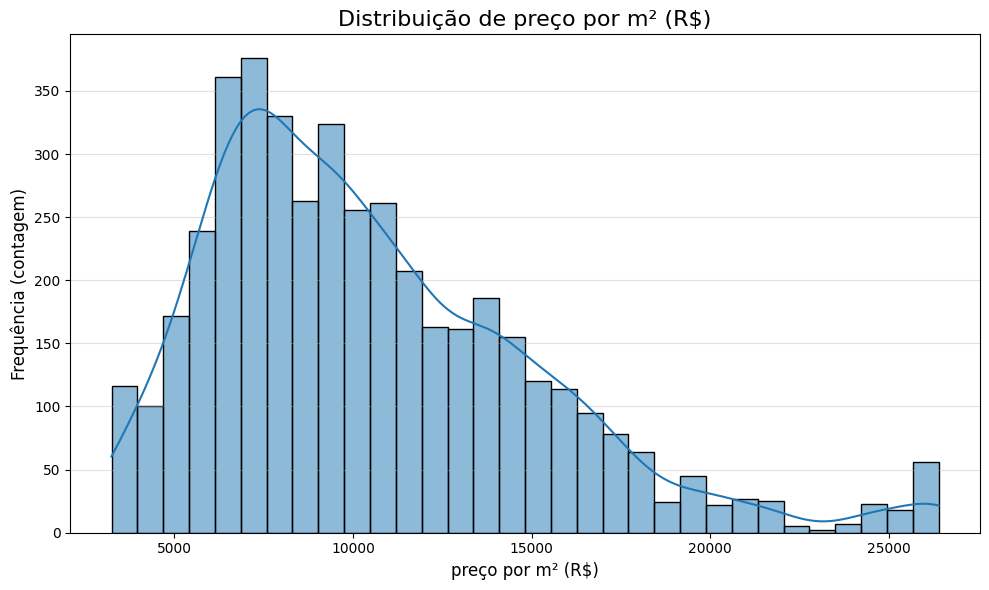

In [7]:
# Exemplos Práticos de Código (Bloco 1 - Histograma):

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Ler o dataset limpo
df = pd.read_excel('dados_atualizados.xlsx')

# 2) Normalizar nomes de colunas
df = df.copy()
df.columns = (df.columns
                .str.normalize('NFKD').str.encode('ascii', 'ignore').str.decode('ascii')
                .str.lower().str.strip().str.replace(r'[^a-z0-9_]+', '_', regex=True))

# 3) Garantir existencia de preco_m2
col_alvo = 'preco_m2'
if col_alvo not in df.columns:
    # tentar achar preco e area
    candidatos_preco = ['preco_m2','preco','preco_total','valor','valor_total']
    candidatos_area  = ['area','area_m2','m2','metragem','area_total']

    col_preco = next((c for c in candidatos_preco if c in df.columns), None)
    col_area  = next((c for c in candidatos_area  if c in df.columns), None)

    if not col_preco or not col_area:
        raise KeyError(f"Não encontrei colunas de preço/área para calcular preco_m2. Colunas atuais: {list(df.columns)}")

    df[col_alvo] = pd.to_numeric(df[col_preco], errors='coerce') / pd.to_numeric(df[col_area], errors='coerce')

# 4) Série numérica limpa
s = pd.to_numeric(df[col_alvo], errors='coerce').dropna()

# 5) Preparar s_plot (com corte de extremos para visual melhor)
TRIM_OUTLIERS = True
if TRIM_OUTLIERS and len(s) >= 50:
    lo, hi = s.quantile([0.01, 0.99])
    # usar clip para manter o mesmo tamanho (evita NaN/figuras vazias)
    s_plot = s.clip(lower=lo, upper=hi)
else:
    s_plot = s

# 6) Checagens úteis
if s_plot.empty:
    raise ValueError("A série para plot está vazia. Verifique se 'preco_m2' foi calculado corretamente e se há valores válidos.")

print(f"Observações válidas: {len(s_plot)} | min={s_plot.min():.2f} | p50={s_plot.median():.2f} | p90={s_plot.quantile(0.90):.2f} | max={s_plot.max():.2f}")

# 7) Histograma (habilita KDE só se houver variação suficiente)
kde_flag = s_plot.nunique() > 1
plt.figure(figsize=(10, 6))
sns.histplot(s_plot, kde=kde_flag, bins='auto')
plt.title('Distribuição de preço por m² (R$)', fontsize=16)
plt.xlabel('preço por m² (R$)', fontsize=12)
plt.ylabel('Frequência (contagem)', fontsize=12)
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()



In [ ]:
# 7. Vamos escolher duas variáveis numéricas que acreditamos estar relacionadas (ex: área_do_imóvel e preço). Qual é a nossa hipótese sobrea direção e a força dessa relação? (Ex: "Acreditamos que quanto maior a área, maior o preço" - uma relação positiva e forte).
# # R:Par escolhido: área (m²) × preço total (R$).

# Hipótese

# Direção: positiva — imóveis maiores tendem a custar mais.

# Forma: quase linear, mas com retornos marginais decrescentes (curva levemente côncava: a cada m² extra, o acréscimo no preço cresce um pouco menos).

# Força: forte — esperamos correlação de ordem (Spearman) > 0,7 e Pearson alta, atenuada por:

# Heterocedasticidade (dispersão aumenta em áreas maiores).

# Moderadores como vista_mar, nº de vagas e padrão/ano do prédio.

# Achado alternativo (surpreendente):

# Relação só moderada/fraca (< 0,5) — indicando que qualidade/localização explicam mais o preço que a metragem.

# Observação útil para análises seguintes: também esperamos uma relação negativa fraca a moderada entre área e preço por m² (unidades maiores tendem a ter R$/m² um pouco menor).

In [ ]:
# 8.Se o nosso scatter plot não mostrar nenhuma relação clara (apenas uma "nuvem de pontos" aleatória), o que isso nos diz? Significa que as variáveis não têm relação, ou que a relação pode ser mais complexa e não-linear?
# R:Uma “nuvem de pontos” não prova ausência de relação — pode indicar que a relação é fraca, mascarada ou não linear. Leituras possíveis e próximos passos:

# Não linearidade / saturação: a relação existe, mas é curva (ex.: retornos marginais decrescentes).
# → Tente log-log (ex.: log(preço) vs log(área)), polinômios (², ³) ou LOESS.

# Mistura de subgrupos (Simpson): segmentos com comportamentos distintos se anulam (novo vs. antigo; com vs. sem vista; 0–1 vs. 2+ vagas).
# → Estratifique por vista_mar, vagas, padrão/ano, localização; compare subplots/cores.

# Escala e overplotting: valores muito concentrados ou faixas amplas escondem o padrão.
# → Use transparência (alpha), hexbin/density e ajuste de eixos (log).

# Métrica inadequada: cruzar preço com área pode “confundir” porque o driver é preço/m².
# → Teste preço/m² vs. área, ou preço vs. qualidade/localização.

# Outliers/heterocedasticidade: poucos pontos extremos “apagam” a tendência, e a variância cresce com a área.
# → Faça boxplots, corte/winsorize para visualizar, e teste modelos robustos (MAE/quantis).

# Correlação inadequada: Pearson capta linearidade; relações monótonas curvas passam “batido”.
# → Calcule Spearman/Kendall e informação mútua (MIC) para relações não lineares.

# Variáveis omitidas / erro de medida: localização, padrão, andar ou vista faltando podem ser o verdadeiro motor.
# # → Inclua interações e teste parcial correlation (ex.: preço ~ área + vista + vagas + bairro).


In [ ]:
# 9.O que um "ponto" isolado e muito distante dos outros (um outlier) em um scatter plot representa em termos práticos para o nosso problema? (Ex: "um imóvel muito pequeno e extremamente caro").
# R: No nosso caso (imóveis no Centro/Florianópolis), um outlier no scatter (ex.: área × preço ou área × preço/m²) costuma significar:

# Possíveis significados práticos

# Produto realmente atípico: cobertura/triplex com vista plena para o mar, super reformado, com 3+ vagas — muito caro para a área.

# Micro-imóvel “premium”: studio de 20–35 m² com lazer completo e vista — R$/m² muito alto.

# Pequeno com preço inflado por atributo escasso: 1 vaga em região onde vaga é raridade.

# Barganha/risco: unidade muito barata para a área (ex.: prédio antigo sem elevador, urgência de venda, leilão).

# Erro ou ruído de dado: preço em milhares sem multiplicar por 1.000; vírgula/ponto trocados; área cadastrada errada; preço já com/sem garagem somada; anúncio duplicado.

# Por que importa

# Puxa correlação e inclinação da regressão (alto leverage/influência) e distorce médias.

# Muda a percepção visual (escala espremida), escondendo o padrão do “miolo” dos dados.

# Pode sinalizar oportunidade (sub/sobrepreço) ou problema de qualidade do dataset.

# O que fazer quando aparece

# Auditar: conferir no anúncio original, checar preco, area, preco_m2, vista_mar, vagas, ano/padrão.

# Comparar com o bairro/segmento: diferença vs. mediana/percentis do mesmo recorte.

# Decidir tratamento (e documentar):

# Corrigir (se erro claro),

# Winsorizar/capar para gráficos,

# Transformar (log) para modelagem,

# Modelos robustos (MAE, Huber, regressão quantílica),

# Ou excluir com critério (ex.: fora do [1º, 99º] percentil) quando o objetivo é entender o padrão típico.

# # Comunicar: se legítimo, destaque como caso especial (“cobertura vista mar, +70% acima do bairro”) — isso é insight de negócio.

4263 obs | Pearson=0.74 | Spearman=0.81


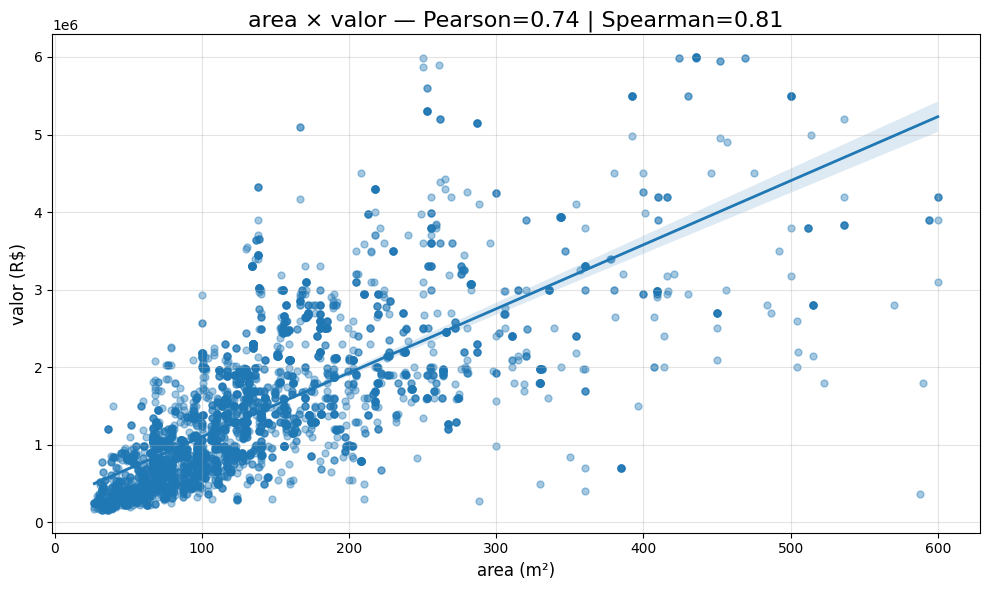

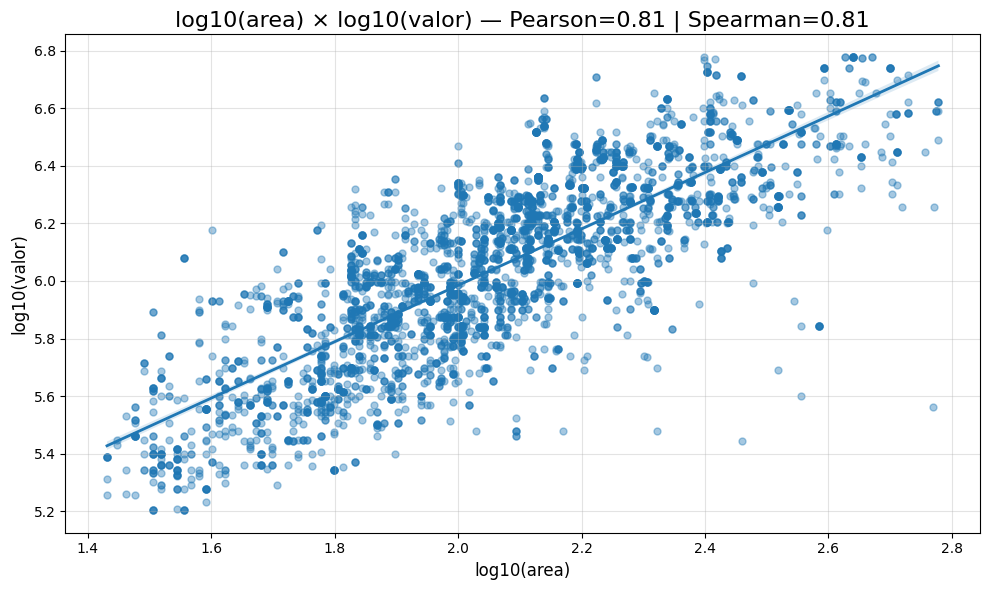

In [8]:
# Exemplos Práticos de Código (Bloco 2 - Scatter Plot):

# --- Bloco 2A: Scatter área (m²) × preço (R$) — usa o df já carregado no Bloco 1 ---

# 1) Achar nomes de colunas já normalizados (do Bloco 1)
cand_area  = ['area','area_m2','m2','metragem','area_total']
cand_preco = ['preco','valor','preco_total','valor_total']

var_x = next((c for c in cand_area  if c in df.columns), None)
var_y = next((c for c in cand_preco if c in df.columns), None)
if not var_x or not var_y:
    raise KeyError(f"Não encontrei colunas de área/preço no df atual. Colunas: {list(df.columns)}")

# 2) Base limpa
base = df[[var_x, var_y]].copy()
base[var_x] = pd.to_numeric(base[var_x], errors='coerce')
base[var_y] = pd.to_numeric(base[var_y], errors='coerce')
base = base.dropna()

# (opcional) aparar extremos para visual melhor
if len(base) >= 50:
    qx_lo, qx_hi = base[var_x].quantile([0.01, 0.99])
    qy_lo, qy_hi = base[var_y].quantile([0.01, 0.99])
    base = base[(base[var_x].between(qx_lo, qx_hi)) & (base[var_y].between(qy_lo, qy_hi))]

# 3) Correlações
pear = base[var_x].corr(base[var_y], method='pearson')
spear = base[var_x].corr(base[var_y], method='spearman')
print(f"{len(base)} obs | Pearson={pear:.2f} | Spearman={spear:.2f}")

# 4) Scatter com linha de tendência
plt.figure(figsize=(10, 6))
sns.regplot(x=var_x, y=var_y, data=base,
            scatter_kws={'alpha':0.4, 's':25},
            line_kws={'linewidth':2})
plt.title(f'{var_x} × {var_y} — Pearson={pear:.2f} | Spearman={spear:.2f}', fontsize=16)
plt.xlabel(f'{var_x} (m²)' if 'area' in var_x else var_x, fontsize=12)
plt.ylabel(f'{var_y} (R$)'  if any(k in var_y for k in ['preco','valor']) else var_y, fontsize=12)
plt.grid(alpha=0.35)
plt.tight_layout()
plt.show()

# 5) (opcional) Versão log-log (costuma linearizar)
base_pos = base[(base[var_x] > 0) & (base[var_y] > 0)].copy()
if len(base_pos) > 0:
    base_pos['log_x'] = np.log10(base_pos[var_x])
    base_pos['log_y'] = np.log10(base_pos[var_y])
    pear_log  = base_pos['log_x'].corr(base_pos['log_y'], method='pearson')
    spear_log = base_pos['log_x'].corr(base_pos['log_y'], method='spearman')

    plt.figure(figsize=(10, 6))
    sns.regplot(x='log_x', y='log_y', data=base_pos,
                scatter_kws={'alpha':0.4, 's':25},
                line_kws={'linewidth':2})
    plt.title(f'log10({var_x}) × log10({var_y}) — Pearson={pear_log:.2f} | Spearman={spear_log:.2f}', fontsize=16)
    plt.xlabel(f'log10({var_x})', fontsize=12)
    plt.ylabel(f'log10({var_y})', fontsize=12)
    plt.grid(alpha=0.35)
    plt.tight_layout()
    plt.show()

# 6) (opcional) Colorir por vista_mar se existir
if 'vista_mar' in df.columns:
    base_hue = df[[var_x, var_y, 'vista_mar']].copy()
    base_hue[var_x] = pd.to_numeric(base_hue[var_x], errors='coerce')
    base_hue[var_y] = pd.to_numeric(base_hue[var_y], errors='coerce')
    base_hue = base_hue.dropna()
    if len(base_hue) >= 50:
        qx_lo, qx_hi = base_hue[var_x].quantile([0.01, 0.99])
        qy_lo, qy_hi = base_hue[var_y].quantile([0.01, 0.99])
        base_hue = base_hue[(base_hue[var_x].between(qx_lo, qx_hi)) & (base_hue[var_y].between(qy_lo, qy_hi))]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=base_hue, x=var_x, y=var_y, hue='vista_mar', alpha=0.5)
    plt.title(f'{var_x} × {var_y} por vista_mar', fontsize=16)
    plt.xlabel(f'{var_x} (m²)' if 'area' in var_x else var_x, fontsize=12)
    plt.ylabel(f'{var_y} (R$)'  if any(k in var_y for k in ['preco','valor']) else var_y, fontsize=12)
    plt.grid(alpha=0.35)
    plt.tight_layout()
    plt.show()



In [ ]:
# 10. Vamos comparar uma variável numérica (valor_gasto) entre duas ou mais categorias (plano_de_assinatura). Qual categorianós hipotetizamos que terá a média ou mediana mais alta? Por quê?
# R:Variável numérica: preco_m2
# Categoria: vista_mar (Sim/Não)

# Hipótese: a categoria “vista_mar = Sim” terá a mediana (e a média) de preco_m2 mais alta.
# Por quê? Porque “vista” é um atributo escasso e muito valorizado no Centro/Beira-Mar: costuma vir associado a empreendimentos de padrão mais alto (amenidades, acabamento, localização premium), elevando o valor por m² mesmo controlando por área. Como preco_m2 já normaliza o efeito da metragem, o prêmio tende a aparecer mais limpo do que em preco total.

# Se quisermos um segundo recorte:

# vagas (0–1 vs. 2+) → esperamos preço total bem maior em 2+ vagas e um preço/m² levemente superior (efeito menor que “vista”).

# Métrica para comparar: usar mediana (robusta a outliers) e complementar com média aparada/IQR.

# Em uma linha: Hipótese principal — “Vista para o mar” lidera preco_m2; secundária — “2+ vagas” lidera preço total e pode ter um leve prêmio em preco_m2.


In [ ]:
# 11. O que a "altura da caixa" (o intervalo interquartil) em um boxplot nos diz sobre os dados de uma categoria? Por que uma caixa "alta" paraa categoria "Plano Premium" e uma caixa "baixa" para o "Plano Básico" seria um insight interessante?
# R: Caixa alta ⇒ grande heterogeneidade/variabilidade (dados mais espalhados, menos previsíveis).

# Caixa baixa ⇒ homogeneidade (dados concentrados, mais previsíveis).

# O IQR é robusto a outliers (um ponto extremo não “esticará” a caixa).

# Por que “Premium” alto e “Básico” baixo é interessante?

# Sugere que o Plano Premium agrega subsegmentos distintos (ex.: clientes muito diferentes entre si), possivelmente com tiers ocultos ou “extras” que variam bastante.

# Indica oportunidade de segmentação/precificação no Premium (criar subplanos, pacotes ou ancoragens) e maior incerteza para previsão de custos/receita.

# O Básico, com caixa baixa, é mais estável e previsível, útil para planejamento operacional e definição de SLA/capacidade.

# Ações práticas:

# Investigar o que explica a variação no Premium (ex.: perfil, add-ons, canal, região) com boxplots/violin por subgrupos.

# Avaliar política de preços (bundles/tiers) e comunicação de valor no Premium.

# Usar a categoria Básico como baseline (benchmark) de desempenho e custos.

# No nosso contexto imobiliário, um análogo seria “vista_mar = Sim” ter caixa mais alta em preco_m2 (mistura de frente total, lateral, prédios novos/antigos), enquanto “vista_mar = Não” ter caixa mais baixa, mostrando mercado mais uniforme.

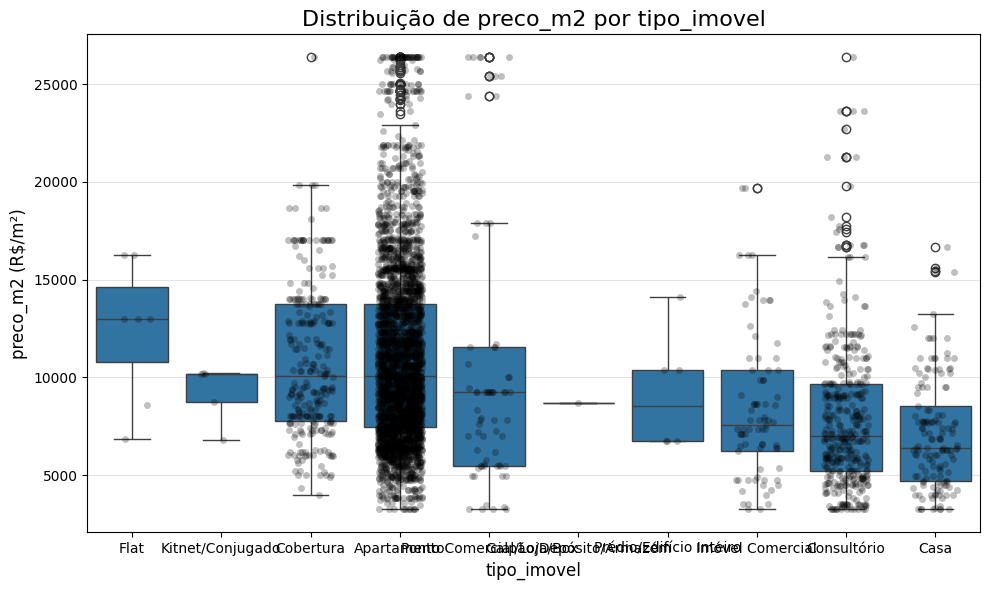


Resumo por categoria (ordenado pela mediana):
                          count    median      mean      iqr
tipo_imovel                                                 
Flat                          7  12968.75  12400.02  3831.93
Kitnet/Conjugado              5  10166.67   9215.09  1416.67
Cobertura                   261  10086.46  10801.32  5995.20
Apartamento                3411  10065.79  11021.90  6278.74
Ponto Comercial/Loja/Box     67   9230.77  10667.49  6092.52
Galpão/Depósito/Armazém       1   8673.47   8673.47     0.00
Prédio/Edifício Inteiro       6   8553.37   9176.60  3669.23
Imóvel Comercial             77   7575.76   8423.16  4125.00
Consultório                 380   7014.26   7962.56  4491.14
Casa                        141   6400.00   7124.18  3872.66

Insight rápido:
- Mediana mais alta: Flat = 12968.75
- Mediana mais baixa: Casa = 6400.00
- Diferença: 6568.75 (102.6% acima)


In [9]:
# # Exemplos Práticos de Código (Bloco 2 - Scatter Plot):Python
# # --- Scatter Plot: Para ver a relação entre DUAS variáveis numéricas ---# Pergunta de exemplo: "Clientes com maior renda gastam mais em nosso site?"

# Ele prioriza preco_m2 × vista_mar. Se vista_mar não existir, ele tenta outro categórico (ex.: bairro). Se nada útil existir, ele cria uma categoria a partir de vagas (0, 1, 2+).


if 'preco_m2' not in df.columns:
    # tenta calcular a partir de preco/area se necessário
    cand_preco = ['preco','valor','preco_total','valor_total']
    cand_area  = ['area','area_m2','m2','metragem','area_total']
    col_preco = next((c for c in cand_preco if c in df.columns), None)
    col_area  = next((c for c in cand_area  if c in df.columns), None)
    if not col_preco or not col_area:
        raise KeyError(f"Faltam colunas para calcular preco_m2. Colunas atuais: {list(df.columns)}")
    df['preco_m2'] = pd.to_numeric(df[col_preco], errors='coerce') / pd.to_numeric(df[col_area], errors='coerce')

# 1) Escolher variável categórica
# prioridade: vista_mar -> bairro (com poucas categorias) -> categorias derivadas de vagas (0,1,2+)
var_numerica = 'preco_m2'

def escolher_categorica(dframe):
    if 'vista_mar' in dframe.columns:
        return 'vista_mar'
    # procura algum categórico com até ~12 categorias
    candidatos = ['bairro','tipo_imovel','padrao','construtora','andar']  # ajuste se quiser
    for c in candidatos:
        if c in dframe.columns and dframe[c].nunique(dropna=True) >= 2 and dframe[c].nunique(dropna=True) <= 12:
            return c
    # fallback: derivar de vagas (0,1,2+)
    candidatos_vagas = ['vagas','vagas_garagem','num_vagas']
    col_vagas = next((c for c in candidatos_vagas if c in dframe.columns), None)
    if col_vagas:
        v = pd.to_numeric(dframe[col_vagas], errors='coerce')
        cats = pd.Series(np.where(v >= 2, '2+',
                          np.where(v == 1, '1',
                          np.where(v == 0, '0', np.nan))), index=dframe.index)
        dframe['_vagas_cat'] = cats
        return '_vagas_cat'
    raise KeyError("Não encontrei uma coluna categórica adequada (vista_mar/bairro/... ou vagas).")

var_categorica = escolher_categorica(df)

# 2) Preparar base
base = df[[var_categorica, var_numerica]].copy()
base[var_numerica] = pd.to_numeric(base[var_numerica], errors='coerce')
base = base.dropna()

# (opcional) aparar extremos para visual melhor
TRIM = True
if TRIM and len(base) >= 50:
    lo, hi = base[var_numerica].quantile([0.01, 0.99])
    base[var_numerica] = base[var_numerica].clip(lower=lo, upper=hi)

# Se houver muitas categorias, limitar às Top 10 por mediana para não poluir o gráfico
grp = base.groupby(var_categorica, dropna=True)[var_numerica]
resumo = grp.agg(count='count', median='median', mean='mean',
                 q1=lambda s: s.quantile(0.25),
                 q3=lambda s: s.quantile(0.75))
resumo['iqr'] = resumo['q3'] - resumo['q1']
resumo = resumo.sort_values('median', ascending=False)

categorias_ordenadas = resumo.index.tolist()
if len(categorias_ordenadas) > 10:
    categorias_ordenadas = categorias_ordenadas[:10]
    base = base[base[var_categorica].isin(categorias_ordenadas)]

# 3) Boxplot ordenado pela mediana
plt.figure(figsize=(10, 6))
sns.boxplot(x=var_categorica, y=var_numerica, data=base, order=categorias_ordenadas)
# overlay de pontos para dar noção de densidade (jitter)
sns.stripplot(x=var_categorica, y=var_numerica, data=base, order=categorias_ordenadas,
              alpha=0.25, color='k', jitter=0.25)
plt.title(f'Distribuição de {var_numerica} por {var_categorica}', fontsize=16)
ylabel = f'{var_numerica} (R$/m²)' if var_numerica == 'preco_m2' else var_numerica
plt.ylabel(ylabel, fontsize=12)
plt.xlabel(var_categorica, fontsize=12)
plt.grid(axis='y', alpha=0.35)
plt.tight_layout()
plt.show()

# 4) Imprimir um resumo compacto e um "insight" rápido
resumo_print = resumo.loc[categorias_ordenadas, ['count','median','mean','iqr']].round(2)
print("\nResumo por categoria (ordenado pela mediana):")
print(resumo_print)

if len(categorias_ordenadas) >= 2:
    top, bot = categorias_ordenadas[0], categorias_ordenadas[-1]
    med_top = resumo.loc[top, 'median']
    med_bot = resumo.loc[bot, 'median']
    diff_abs = med_top - med_bot
    diff_pct = (diff_abs / med_bot * 100.0) if med_bot != 0 else np.nan
    print(f"\nInsight rápido:")
    print(f"- Mediana mais alta: {top} = {med_top:.2f}")
    print(f"- Mediana mais baixa: {bot} = {med_bot:.2f}")
    print(f"- Diferença: {diff_abs:.2f} ({diff_pct:.1f}% acima)")